In [1]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

In [3]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.18.0


In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

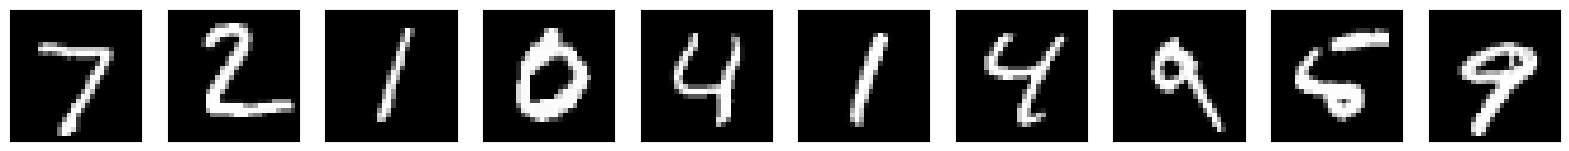

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(20, 5))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

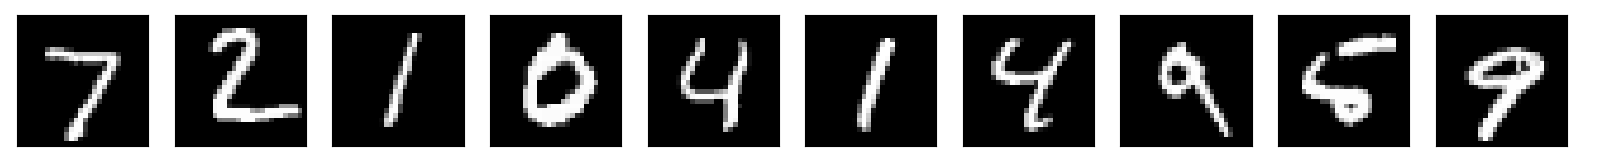

In [11]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape

In [13]:
encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2),  padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation = 'relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

encode_model.add(Flatten(input_shape=[7,7,8]))
encode_model.add(Dense(7*7*8, activation="relu"))
encode_model.add(Dense(30, activation="relu"))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
############
# Decoding #
############
decode_model=Sequential()

decode_model.add(Dense(7*7*8,activation="relu"))
decode_model.add(Reshape([7,7,8]))

# DeConv1
decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# Deconv2
decode_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))


In [17]:
autoencoder = Sequential([encode_model, decode_model]) 

In [19]:
autoencoder.compile(optimizer='Adadelta', loss='binary', metrics=['accuracy'])

In [21]:
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 30)             │       167,166 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │        14,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,215 (707.87 KB)

 Trainable params: 181,215 (707.87 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras import models

In [25]:
autoencoder.save('Conv_autoencoder.keras')

In [27]:
encode_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 392)            │       154,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        11,790 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,166 (652.99 KB)

 Trainable params: 167,166 (652.99 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
decode_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 392)            │        12,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,049 (54.88 KB)

 Trainable params: 14,049 (54.88 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255
x_train.shape

(60000, 28, 28, 1)

In [35]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

(10000, 28, 28, 1)

In [37]:
# Train the model
z = 6
epochs = z + 40
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = autoencoder.fit(x=x_train, y=x_train,  epochs=epochs, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7915 - loss: 0.3341 - val_accuracy: 0.8072 - val_loss: 0.0674
Epoch 2/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8059 - loss: 0.1369 - val_accuracy: 0.8072 - val_loss: 0.0334
Epoch 3/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8089 - loss: 0.1222 - val_accuracy: 0.8072 - val_loss: 0.0237
Epoch 4/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8096 - loss: 0.1159 - val_accuracy: 0.8072 - val_loss: 0.0170
Epoch 5/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8098 - loss: 0.1125 - val_accuracy: 0.8072 - val_loss: 0.0132
Epoch 6/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8112 - loss: 0.1082 - val_accuracy: 0.8072 - val_loss: 0.0112
Epoch 7/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8110 - loss: 0.1062 - val_accuracy: 0.8072 - val_loss: 0.0104
Epoch 8/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8119 - loss: 0.1043 - 

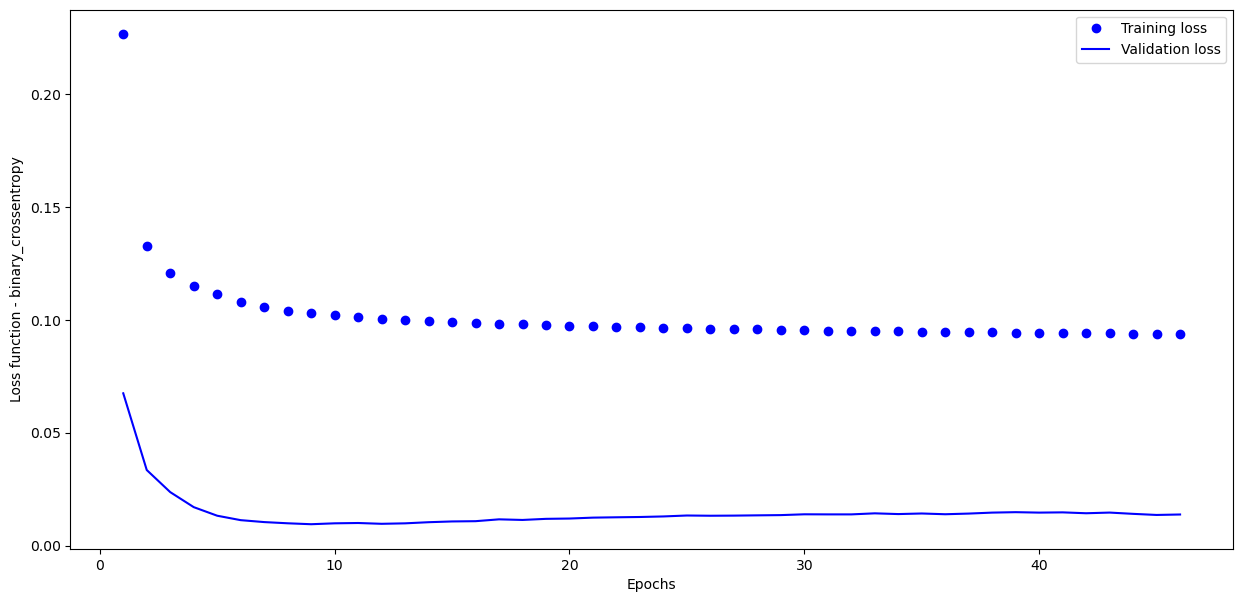

In [39]:
losses = history.history['loss']
losses_val = history.history['val_loss']
epochs = range(1, len(losses) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, losses_val, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.legend()
plt.show()

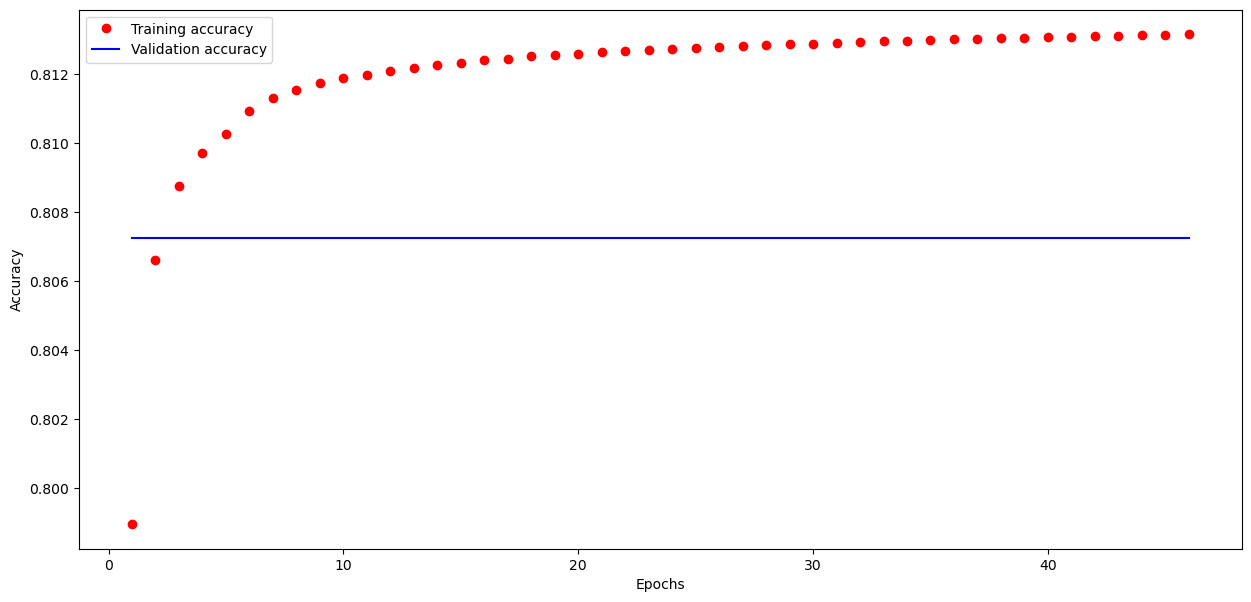

In [41]:
accuracy_array = history.history['accuracy']
val_accuracy_array = history.history['val_accuracy']
epochs = range(1, len(accuracy_array) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


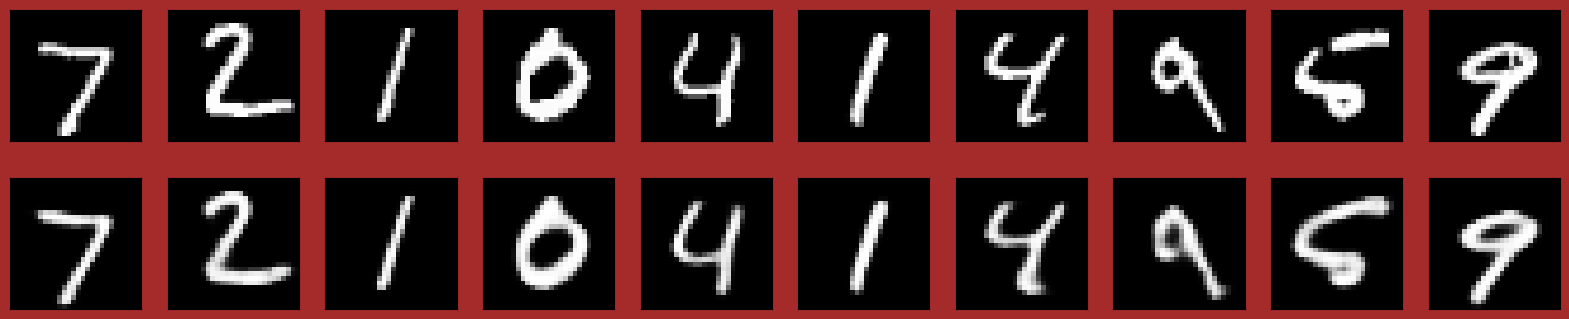

In [49]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4),facecolor='brown',edgecolor='brown')
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


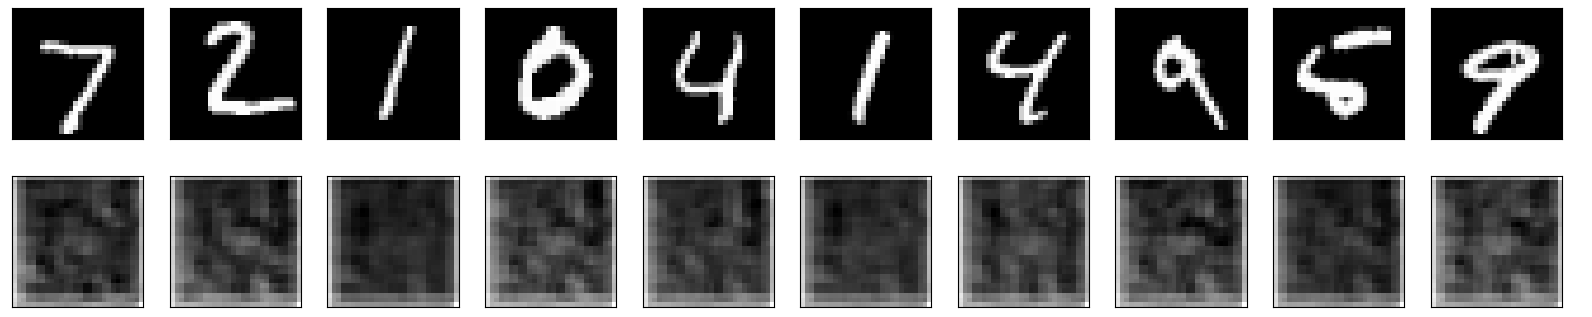

In [ ]:
# optimizer is not so good,
# epoch number should be edded

## Lab Logbook requirement:

1) Copy the autoencoder model and train it with epochs=Z+40,
where your SID is: XXXXXXZ
Leave other parameters the same as in Task 2.

2) Please only add to your Lab Logbook print-screens of:
- Table of your model autoencoder.summary()
- Code of your autoencoder.fit()
- Accuracy detailed graph
- Document the plot of the decoded images for task 2. Change the colour, appearance, and shape of the plot according to your own choice (see plt.figure() parameters).


NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.

In [45]:
# autoencoder_2 = models.load_model('Conv_autoencoder.keras')
(x_train, _), (x_test, _) = mnist.load_data()

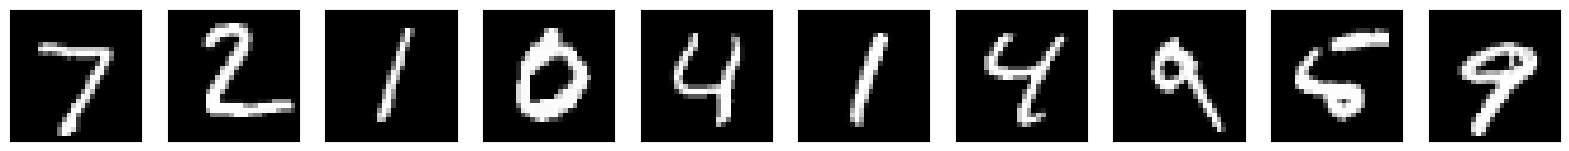

In [11]:
# history_2 = 
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28 ))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [13]:
#
#
#
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape
#


In [15]:
encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2),  padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation = 'relu', padding='same'))
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

encode_model.add(Flatten(input_shape=[7,7,8]))
encode_model.add(Dense(7*7*8, activation="relu"))
encode_model.add(Dense(30, activation="relu"))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
############
# Decoding #
############
decode_model=Sequential()

decode_model.add(Dense(7*7*8,activation="relu"))
decode_model.add(Reshape([7,7,8]))

# DeConv1
decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# Deconv2
decode_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))


In [23]:
autoencoder = Sequential([encode_model, decode_model])

In [25]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 30)             │       167,166 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │        14,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,215 (707.87 KB)

 Trainable params: 181,215 (707.87 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras import models

In [31]:
autoencoder.save('Conv_autoencoder.keras')

In [33]:
encode_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 392)            │       154,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        11,790 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,166 (652.99 KB)

 Trainable params: 167,166 (652.99 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
decode_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 392)            │        12,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,049 (54.88 KB)

 Trainable params: 14,049 (54.88 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255
x_train.shape

(60000, 28, 28, 1)

In [39]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

(10000, 28, 28, 1)

In [43]:
z = 6
epochs = z + 40
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = autoencoder.fit(x=x_train, y=x_train,  epochs=epochs, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8145 - loss: 0.0853 - val_accuracy: 0.8133 - val_loss: 0.0833
Epoch 2/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8141 - loss: 0.0838 - val_accuracy: 0.8133 - val_loss: 0.0833
Epoch 3/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8146 - loss: 0.0835 - val_accuracy: 0.8132 - val_loss: 0.0837
Epoch 4/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8147 - loss: 0.0835 - val_accuracy: 0.8134 - val_loss: 0.0834
Epoch 5/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8142 - loss: 0.0837 - val_accuracy: 0.8134 - val_loss: 0.0835
Epoch 6/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8144 - loss: 0.0835 - val_accuracy: 0.8131 - val_loss: 0.0835
Epoch 7/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8141 - loss: 0.0837 - val_accuracy: 0.8134 - val_loss: 0.0833
Epoch 8/46
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8143 - loss: 0.0835 - 